## Lung Cancer Prediction Using ML Models

In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Read Data 

In [82]:
df = pd.read_csv('survey lung cancer.csv')
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


## Clean Data 

In [83]:
df.duplicated().sum()

33

In [84]:
df.drop_duplicates(inplace=True)

In [85]:
df.duplicated().sum()

0

In [86]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [87]:
df['GENDER'] = df['GENDER'].replace({'M':2,'F':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':2,"NO":1})


## Build Models

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [89]:
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
y

0      2
1      2
2      1
3      1
4      1
      ..
279    2
280    1
281    1
282    1
283    2
Name: LUNG_CANCER, Length: 276, dtype: int64

In [90]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)



In [91]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [92]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['LUNG_CANCER'])], axis=1)


print(df_resampled['LUNG_CANCER'].value_counts())

LUNG_CANCER
2    238
1    238
Name: count, dtype: int64


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [94]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cancer', 'Has Cancer'])
    disp.plot(cmap='Purples')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy 

## RandomForest

In [95]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Classifier Accuracy: 0.98
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        52
           2       1.00      0.95      0.98        44

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



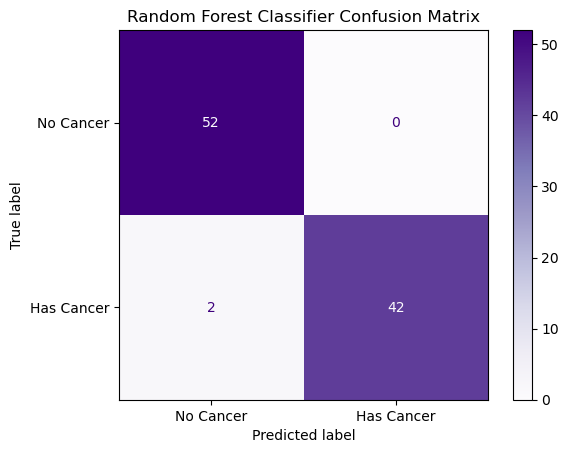

0.9791666666666666

In [100]:
rf_accuracy= evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
rf_accuracy

In [97]:
def predict1(data):
    data = pd.DataFrame(data)
    print(rf.predict_proba(data))

In [99]:
data = {
    'GENDER': 1,
    'AGE': 59,
    'SMOKING': 1,
    'YELLOW_FINGERS': 1,
    'ANXIETY': 1,
    'PEER_PRESSURE': 2,
    'CHRONIC DISEASE': 1,
    'FATIGUE ': 2,
    'ALLERGY ': 1,
    'WHEEZING': 2,
    'ALCOHOL CONSUMING': 1,
    'COUGHING': 2,
    'SHORTNESS OF BREATH': 2,
    'SWALLOWING DIFFICULTY': 1,
    'CHEST PAIN': 2
}


predict1([data])

[[1. 0.]]


In [125]:
import pickle
with open('lungcancer.pkl', 'wb') as file:
    pickle.dump(rf, file)

[1]
